In [108]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import time
import datetime
from IPython import display



data_directory = 'C:\\Files\\manga\\color_raw'
test_directory = 'C:\\Files\\manga\\argurmented'
tf.random.set_seed(42) 
SIZE = [256,256]

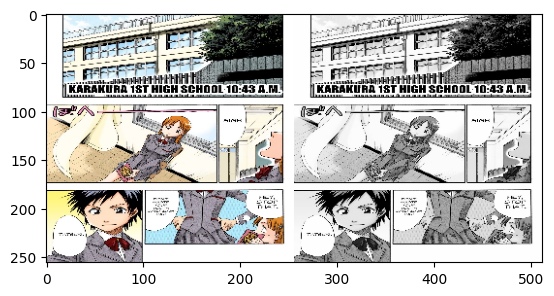

In [109]:
def resize_image(data):
    resized_img = tf.image.resize(
    images=data,
    size=SIZE,
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
    )    
    return resized_img

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img1 = resize_image(plt.imread(os.path.join(folder,filename)))
        img2 =  tf.image.rgb_to_grayscale(img1)
        img2 = np.concatenate((img2,img2,img2),axis=-1)
        img_merged = tf.concat([img1, img2], 1)
        if img2 is not None:
            images.append(img_merged)
    return images

""" def load_images_from_folder(folder):

    images = []
    for filename in os.listdir(folder):
        img1 = resize_image(plt.imread(os.path.join(folder,filename)))
        if img1 is not None:
            images.append(img1)
    return images """

X_test = load_images_from_folder(data_directory)

plt.imshow(np.array(X_test[0], dtype=int))


In [111]:
# tf.keras.preprocessing.image.save_img(test_directory + "\\test0.jpg", X_test[0])

fig_number = np.array(X_test).shape[0]
train_num = round(fig_number*2/3)
test_num = train_num + round(fig_number/6)


for n in range(fig_number):
    dir_save = ""
    if (n < train_num):
        dir_save = f"{test_directory}\\train\\{n}.jpg"
    elif (n < test_num):
        dir_save = f"{test_directory}\\test\\{n}.jpg"
    else:
         dir_save = f"{test_directory}\\val\\{n}.jpg"
    tf.keras.preprocessing.image.save_img(dir_save, X_test[n])
